In [64]:
import numpy as np
import pandas as pd
import glob

In [86]:
#concatenate all files
all_files = glob.glob("dataset/states?.csv")
us_census = pd.concat((pd.read_csv(f, encoding='utf-8', index_col=0) for f in all_files), ignore_index=True)
us_census

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F
1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F
2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F
3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F
4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F
5,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,$64657.801787164906,2648667M_2630239F
6,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,$64657.801787164906,2648667M_2630239F
7,Connecticut,3593222,15.604830917874388%,67.6770531400966%,10.34806763285027%,0.12620772946859898%,4.021980676328502%,0.018599033816425123%,$76146.5605875153,1751607M_1841615F
8,Delaware,926454,8.82476635514019%,64.63271028037383%,20.743925233644834%,0.25981308411214965%,3.2686915887850483%,NaN,$61827.97663551402,448413M_478041F
9,District of Columbia,647484,9.165921787709499%,33.103910614525134%,51.77653631284915%,0.20055865921787713%,3.3832402234636865%,0.029608938547486034%,$75466.36363636363,306674M_340810F


In [88]:
#concatenate All csv files second method
#from os import listdir

#filepaths = [f for f in listdir("./") if f.endswith('.csv')]
#us_census = pd.concat(map(pd.read_csv, filepaths), ignore_index = True)
3us_census

SyntaxError: invalid syntax (<ipython-input-88-5e29586fd2b3>, line 6)

<AxesSubplot:xlabel='FemalePop', ylabel='Income'>

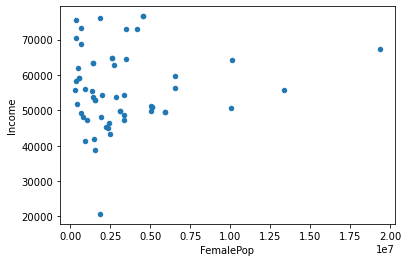

In [66]:
# splitting male and female population from GenderPop column
us_census[['MalePop', 'FemalePop']] =us_census['GenderPop'].str.split('_',expand=True)

# replacing 'str' characters from Income, MalePop and FemalePop column
us_census = us_census.replace({'Income': {'\$': ''},
                         'MalePop': {'M': ''},
                         'FemalePop': {'F': ''}}, regex=True)

# changing data type
us_census[['Income', 'MalePop', 'FemalePop']] = us_census[['Income', 'MalePop', 'FemalePop']].apply(pd.to_numeric)
us_census

# scatter plot of average income vs female population in the state
us_census.plot.scatter('FemalePop', 'Income')

In [67]:
# column names
display(us_census.columns)

# columns datatype
display(us_census.dtypes)

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop', 'MalePop',
       'FemalePop'],
      dtype='object')

Unnamed: 0      int64
State          object
TotalPop        int64
Hispanic       object
White          object
Black          object
Native         object
Asian          object
Pacific        object
Income        float64
GenderPop      object
MalePop         int64
FemalePop     float64
dtype: object

In [68]:
us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,MalePop,FemalePop
0,0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,43296.358603,2341093M_2489527F,2341093,2489527.0
1,1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,70354.743902,384160M_349215F,384160,349215.0
2,2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,54207.820955,3299088M_3342840F,3299088,3342840.0
3,3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,41935.633968,1451913M_1506295F,1451913,1506295.0
4,4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,67264.782303,19087135M_19334329F,19087135,19334329.0


In [69]:
# replacing '$' from Income and converting its data type to numerical type
us_census['Income'] = us_census['Income'].replace({'\$':''}, regex = True).apply(pd.to_numeric)
us_census.dtypes


Unnamed: 0      int64
State          object
TotalPop        int64
Hispanic       object
White          object
Black          object
Native         object
Asian          object
Pacific        object
Income        float64
GenderPop      object
MalePop         int64
FemalePop     float64
dtype: object

In [70]:
# splitting GenderPop column into MalePop and FemalePop columns
us_census[['MalePop', 'FemalePop']] = us_census['GenderPop'].str.split('_',expand=True)
us_census


,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,MalePop,FemalePop
0,0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,43296.358603,2341093M_2489527F,2341093M,2489527F
1,1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,70354.743902,384160M_349215F,384160M,349215F
2,2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,54207.820955,3299088M_3342840F,3299088M,3342840F
3,3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,41935.633968,1451913M_1506295F,1451913M,1506295F
4,4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,67264.782303,19087135M_19334329F,19087135M,19334329F
5,5,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,64657.801787,2648667M_2630239F,2648667M,2630239F
6,0,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,64657.801787,2648667M_2630239F,2648667M,2630239F
7,1,Connecticut,3593222,15.604830917874388%,67.6770531400966%,10.34806763285027%,0.12620772946859898%,4.021980676328502%,0.018599033816425123%,76146.560588,1751607M_1841615F,1751607M,1841615F
8,2,Delaware,926454,8.82476635514019%,64.63271028037383%,20.743925233644834%,0.25981308411214965%,3.2686915887850483%,NaN,61827.976636,448413M_478041F,448413M,478041F
9,3,District of Columbia,647484,9.165921787709499%,33.103910614525134%,51.77653631284915%,0.20055865921787713%,3.3832402234636865%,0.029608938547486034%,75466.363636,306674M_340810F,306674M,340810F


In [72]:
# number of duplicates in us_census
us_census.duplicated().sum()

0

In [73]:
# duplicate rows in us_census
us_census[us_census.duplicated()]

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,MalePop,FemalePop


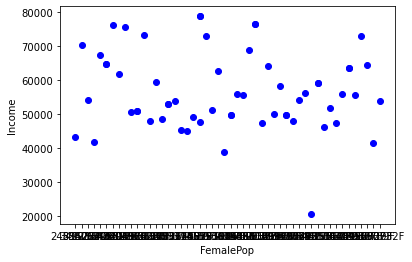

In [74]:
#Making the scatterplot
the_women_column  = us_census['FemalePop']
the_income_column = us_census['Income']

plt.xlabel('FemalePop')
plt.ylabel('Income')
plt.scatter(x=the_women_column, y=the_income_column, c='blue')
plt.show()

In [75]:
us_census.columns

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop', 'MalePop',
       'FemalePop'],
      dtype='object')

In [76]:
# removing '%' from the race columns
us_census = us_census.replace({'Hispanic': {'%': ''},
                               'White': {'%': ''},
                               'Black': {'%': ''},
                               'Native': {'%': ''},
                               'Asian': {'%': ''},
                               'Pacific': {'%': ''}}, regex=True)

In [77]:
# converting race columns data type into numeric format
race_cols = ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']
us_census[race_cols] = us_census[race_cols].apply(pd.to_numeric)
us_census.dtypes

Unnamed: 0      int64
State          object
TotalPop        int64
Hispanic      float64
White         float64
Black         float64
Native        float64
Asian         float64
Pacific       float64
Income        float64
GenderPop      object
MalePop        object
FemalePop      object
dtype: object

In [78]:
# taking the estimated Pacific population per state
est_pacific = 100 + (us_census['Hispanic'] - us_census['Black'] - us_census['White']\
                     - us_census['Asian'] - us_census['Native'])

# filling missing value with estimated pacific population
us_census['Pacific'].fillna(est_pacific, inplace=True)

In [79]:
# finding duplicates if there is any
us_census.duplicated().sum()

0

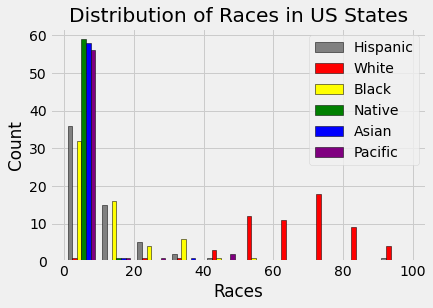

In [80]:
# histogram graph for the all races per state
plt.style.use('fivethirtyeight')

hispanicPop = us_census['Hispanic']
whitePop = us_census['White']
blackPop = us_census['Black']
nativePop = us_census['Native']
asianPop = us_census['Asian']
pacificPop = us_census['Pacific']

mybins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

plt.hist([hispanicPop, whitePop, blackPop, nativePop, asianPop, pacificPop],
         color=['grey', 'red', 'yellow', 'green', 'blue', 'purple'],
         label=['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific'],
         bins=mybins, edgecolor='black')

plt.title('Distribution of Races in US States')
plt.legend(loc='best')
plt.xlabel('Races')
plt.ylabel('Count')
plt.show()

In [81]:
# finding state that has max population
us_census[us_census.TotalPop == us_census.TotalPop.max()]


,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,MalePop,FemalePop
4,4,California,38421464,37.291875,40.215789,5.677396,0.405292,13.052234,0.35141,67264.782303,19087135M_19334329F,19087135M,19334329F


In [82]:
# finding state that has min population
us_census[us_census.TotalPop == us_census.TotalPop.min()]

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,MalePop,FemalePop
55,1,Vermont,626604,1.60929,93.98306,0.980874,0.301639,1.238798,0.030601,55602.967213,308573M_318031F,308573M,318031F


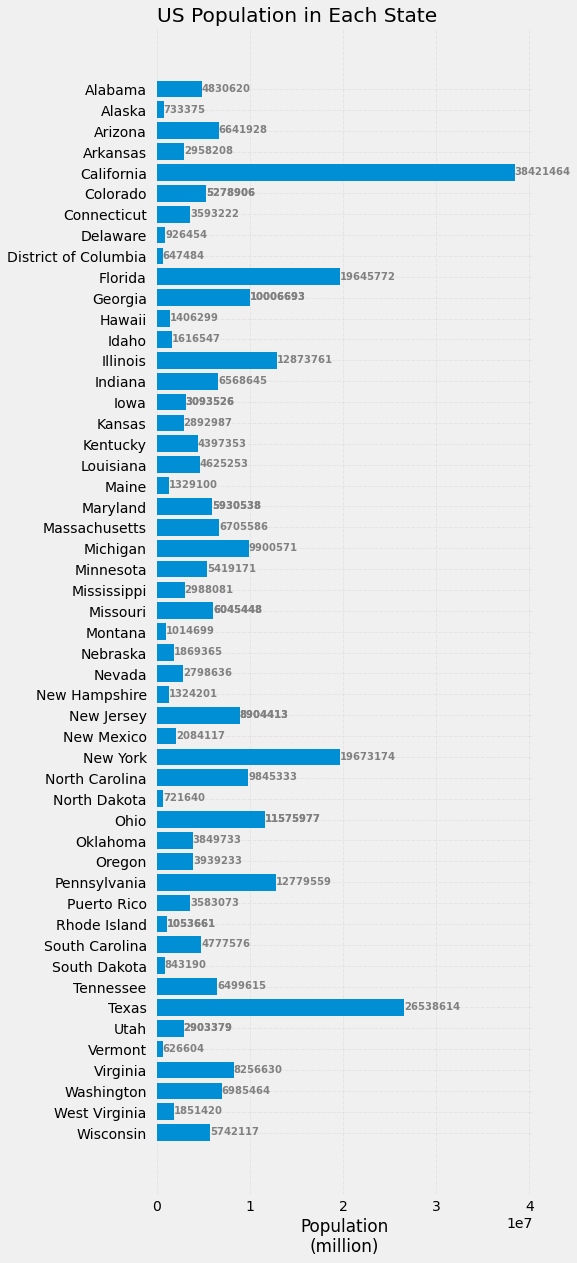

In [83]:
# assigning 'State' and 'TotalPop' columns to the variables
name = us_census['State']
pop = us_census['TotalPop'] 
  
# figure Size 
fig, ax = plt.subplots(figsize =(6, 20)) 
  
# horizontal Bar Plot 
ax.barh(name, pop) 
  
# remove axes splines 
for s in ['top', 'bottom', 'left', 'right']: 
    ax.spines[s].set_visible(False) 

# remove x, y Ticks
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none') 
  
# add padding between axes and labels 
ax.xaxis.set_tick_params(pad = 5) 
ax.yaxis.set_tick_params(pad = 10) 
  
# add x, y gridlines 
ax.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.2) 
  
# show top values  
ax.invert_yaxis() 
  
# add explanation to bars 
for i in ax.patches: 
    plt.text(i.get_width()+0.2, i.get_y()+0.5,  
             str(round((i.get_width()), 2)), 
             fontsize = 10, fontweight ='bold', 
             color ='grey') 

# add title
ax.set_title('US Population in Each State', 
             loc ='left')

# add x-xis label
ax.set_xlabel('Population\n(million)')

# show Plot 
plt.show() 